# Visual Data Analysis Assignment - 3
## By Aakash Aggarwal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# Exercise 1 a)
wine_data = pd.read_csv("winequality-red.csv",delimiter=";")

wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1 b)
####  Range of the quality is ​ 3 to 8​

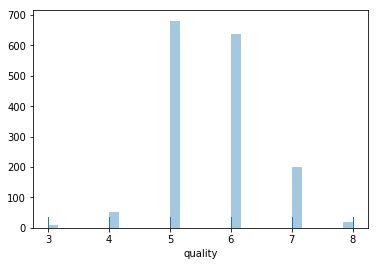

In [3]:
# Exercise 1 b)
sns.distplot(wine_data["quality"], kde=False, rug=True)

### 1 c)

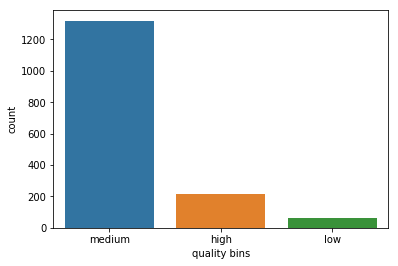

In [4]:
low_indexes = wine_data['quality'] <=4
medium_indexes = (wine_data['quality'] >4) & (wine_data['quality'] <=6)
high_indexes = wine_data['quality'] >6

wine_data.loc[low_indexes, 'quality'] = "low"
wine_data.loc[medium_indexes, 'quality'] = "medium"
wine_data.loc[high_indexes, 'quality'] = "high"

wine_data.rename(columns={"quality": "quality bins"},inplace="True")
sns.countplot(data=wine_data,x="quality bins")

### 1 d)

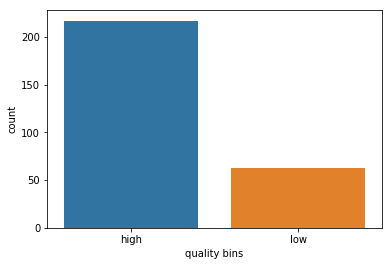

In [5]:
extreme_data = wine_data[wine_data["quality bins"] != "medium"]
sns.countplot(data=extreme_data,x="quality bins")

### 1 e)

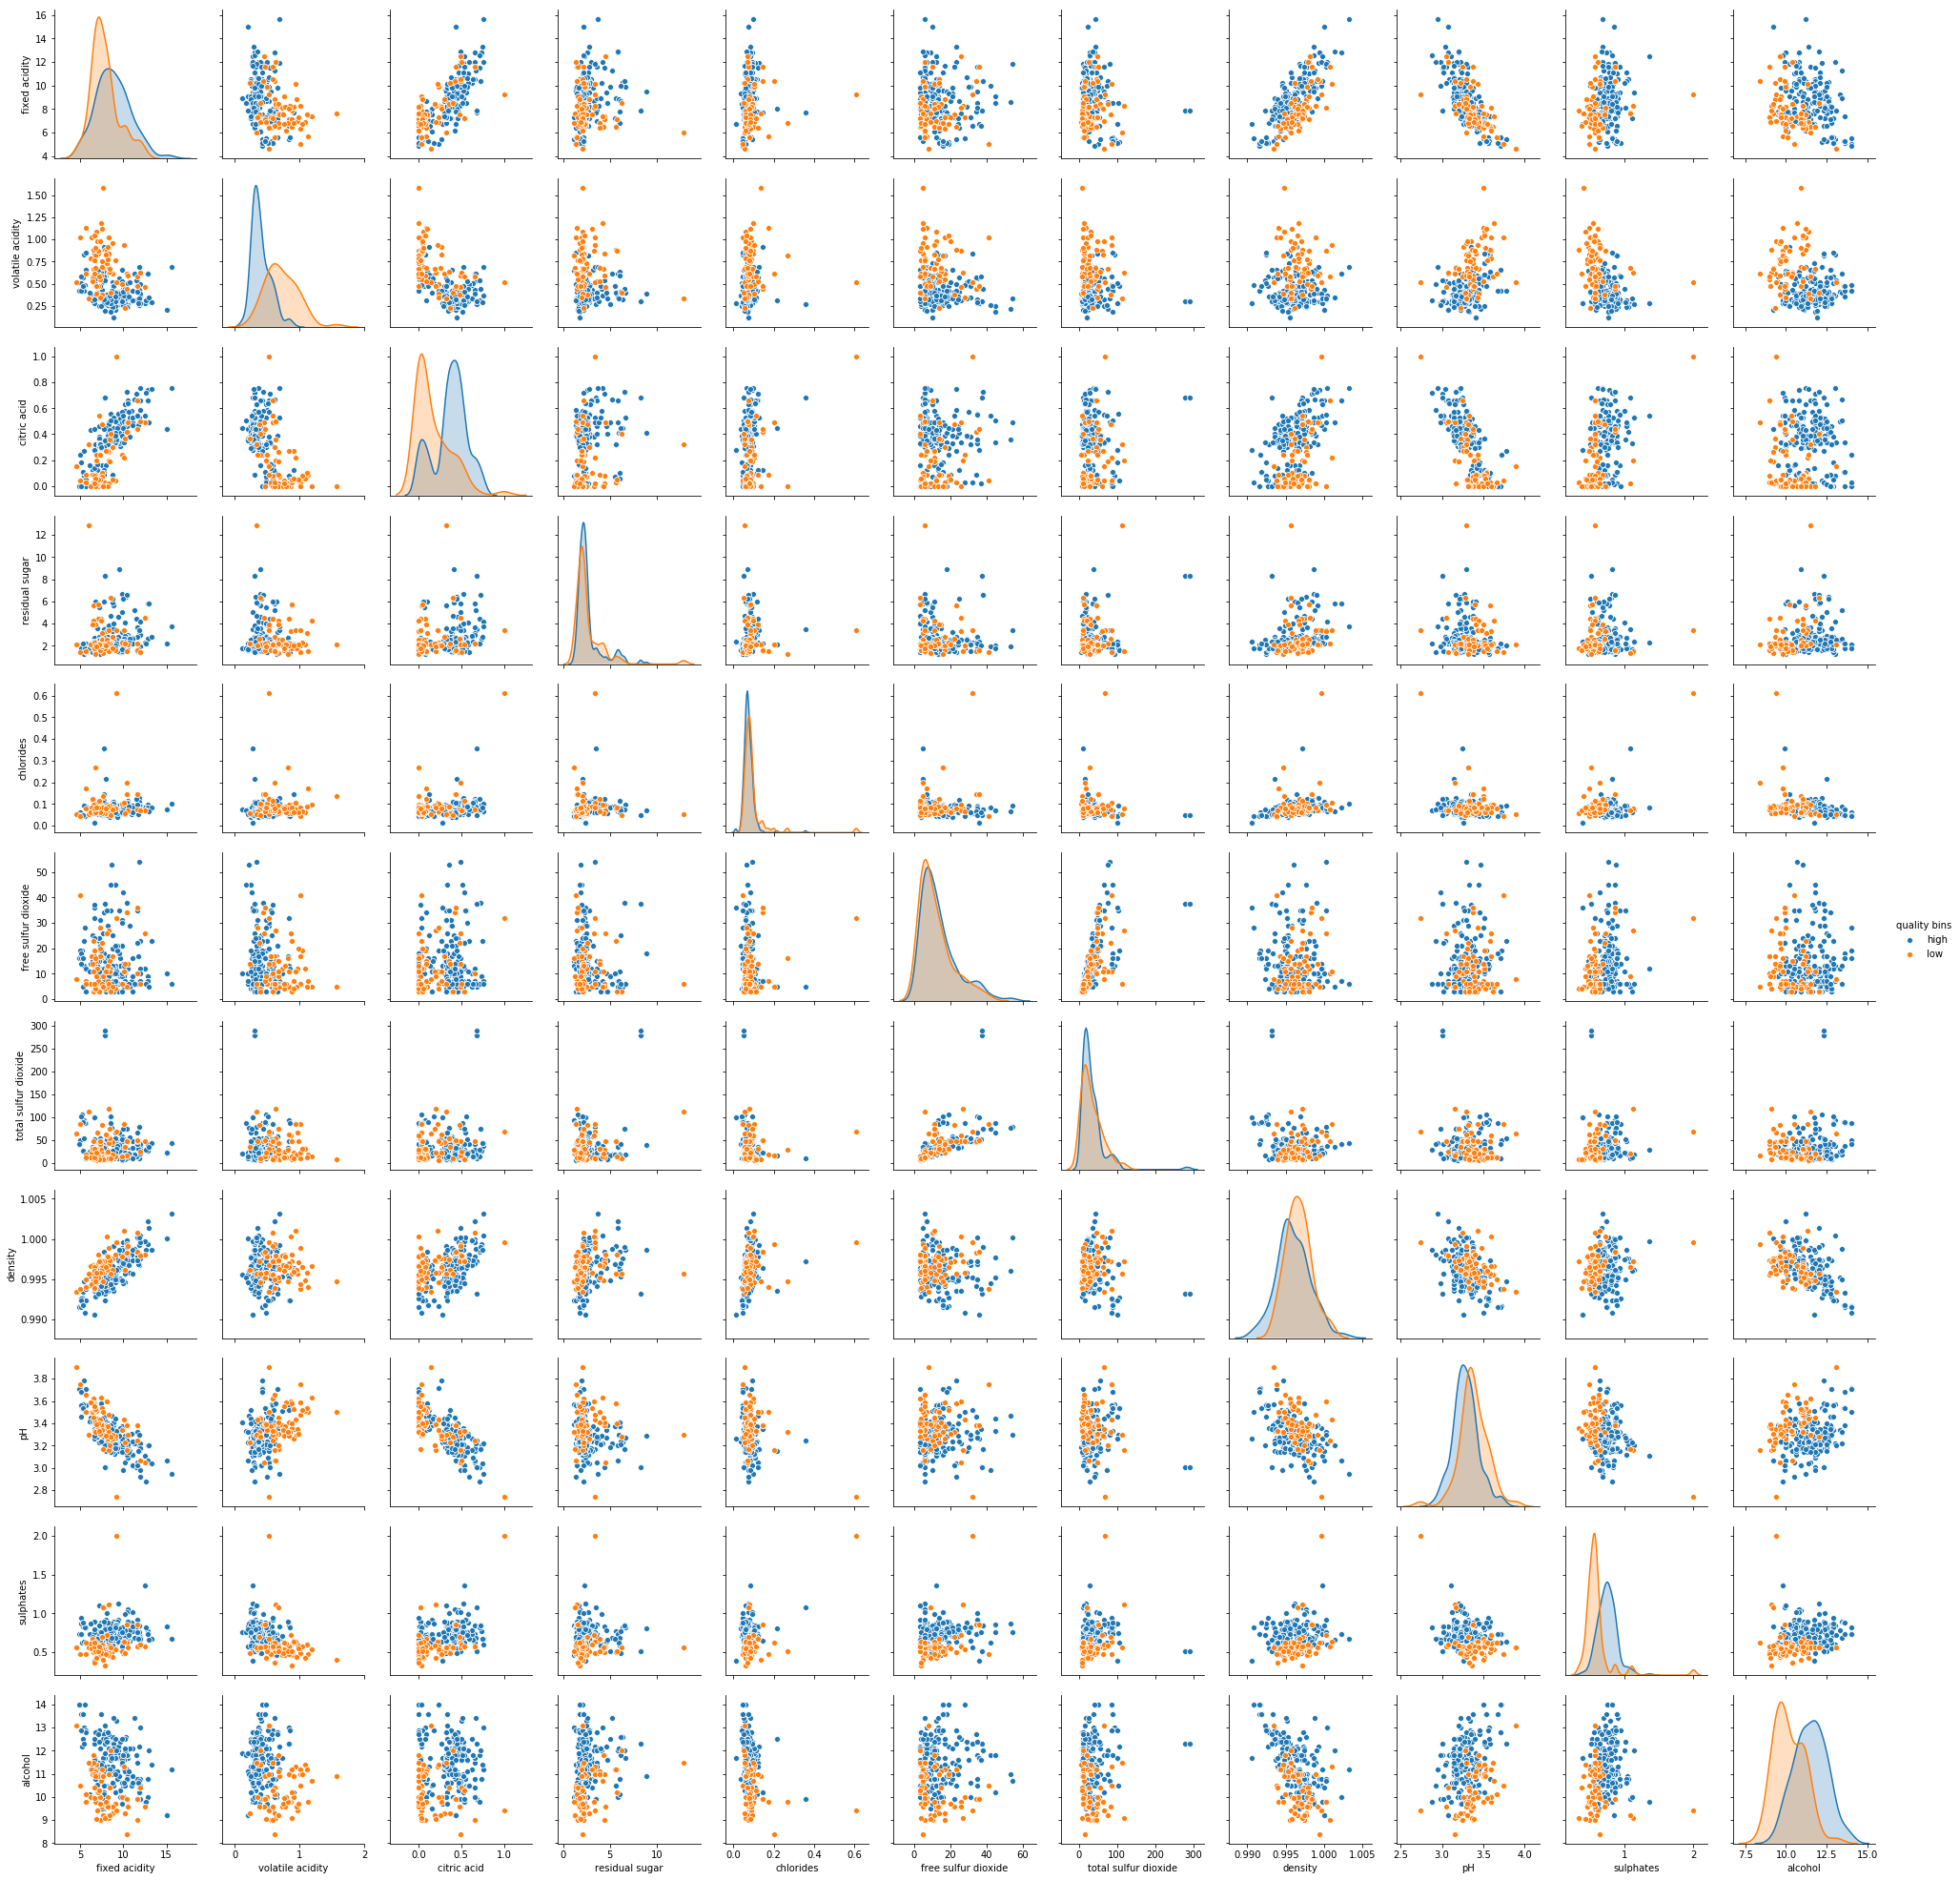

In [6]:
sns.pairplot(extreme_data,hue="quality bins")

### 1 f)
#### ​ citric acid, volatile acidity, density, sulphates, alcohol

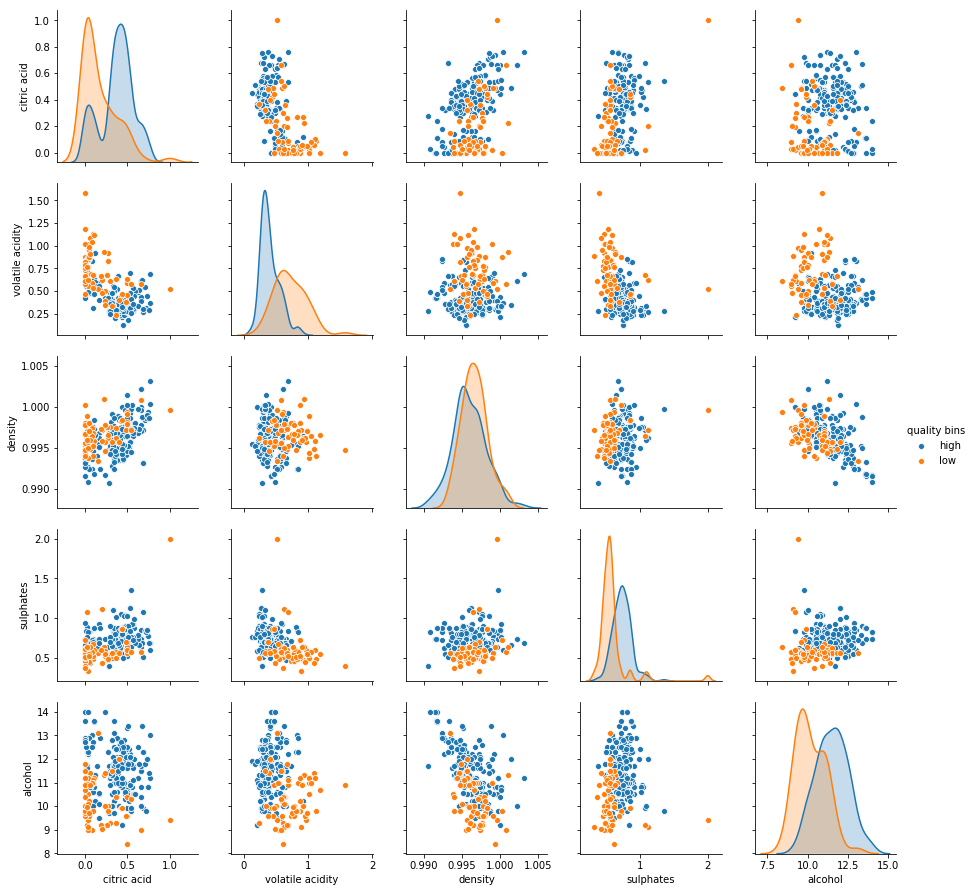

In [7]:
sns.pairplot(extreme_data,hue="quality bins",vars=["citric acid","volatile acidity","density","sulphates","alcohol"])

### 1 g)
#### pH, sulphates, citric acid, alcohol, volatile acidity​ are the five best attributes according to F score measure. ​ No​ , they are not same.

In [8]:
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(f_classif,k=5)

cols = extreme_data.columns
X = extreme_data[cols.drop("quality bins")]
y = extreme_data["quality bins"]

selector.fit(X,y)

top_5_idx = np.argsort(selector.scores_)[-5:]
newColumn = extreme_data.columns[top_5_idx]

print("5 best features are ", newColumn.values)
newColumn = newColumn.insert(item="quality bins",loc=newColumn.size)
selectedData = extreme_data[newColumn]

5 best features are  ['pH' 'sulphates' 'citric acid' 'alcohol' 'volatile acidity']


/home/aakash/anaconda3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


### 1 h)

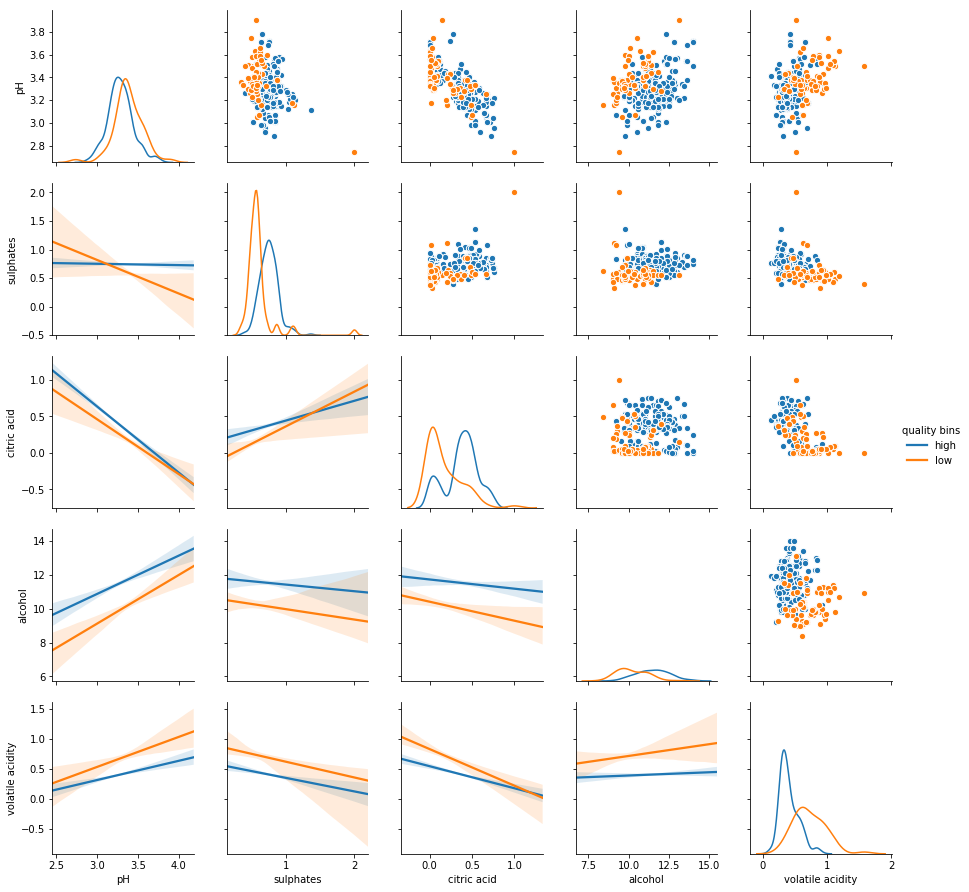

In [9]:
g = sns.PairGrid(selectedData, hue="quality bins")
g = g.map_diag(sns.kdeplot)
g = g.map_upper(plt.scatter,linewidths=1, edgecolor="w", s=40)
g = g.map_lower(sns.regplot,scatter = False)
g = g.add_legend()

### 1 j)

In [10]:
# method to find distance between two points
def getDistance(centroid,cluster):
    diff = cluster - centroid
    dist = np.sqrt(np.square(diff).sum(axis=1))
    return dist

In [11]:
def distanceConsistency(df,cols,cls):
    
#     getting labels (high and low)
    clustersLabel = pd.unique(df[cls].values.ravel('K'))
    
#     separting clusters
    clusters = []
    for label in clustersLabel:
        clusterDf = df[df[cls] == label]
        clusterDf = clusterDf[cols]
        clusters.append(clusterDf)
    
#     calculating centroids for each cluster
    centroids = []
    for cluster in clusters:
        centroid = cluster.mean()
        centroids.append(centroid)
        
    
    closerCount = 0
    for i in range(len(clusters)):
        cluster = clusters[i]
        distances = np.empty((len(centroids),cluster.shape[0]))
        for j in range(len(centroids)):
            centroid = centroids[j]
            # calculating euclidean distances
            distance = getDistance(centroid,cluster)
            distances[j] = distance
        
        #getting indexes with minimum cluster distances and matching with current ith cluster
        minEl = np.argmin(distances,axis=0)
        closerCount +=  np.count_nonzero(minEl == i)
    
    return closerCount*100/df.shape[0]

In [12]:
columns = selectedData.columns.drop("quality bins")

for attribute in columns:
    for attribute2 in columns:
        if attribute != attribute2 :
            dsc = distanceConsistency(selectedData,cols=[attribute,attribute2],cls="quality bins")
            print("Distance Consistency using %s and %s is %.2f percent" % (attribute,attribute2,dsc))
            print("------------------------------------------------------------------")
    
    columns = columns.drop(attribute)
    

Distance Consistency using pH and sulphates is 79.64 percent
------------------------------------------------------------------
Distance Consistency using pH and citric acid is 76.07 percent
------------------------------------------------------------------
Distance Consistency using pH and alcohol is 71.79 percent
------------------------------------------------------------------
Distance Consistency using pH and volatile acidity is 81.43 percent
------------------------------------------------------------------
Distance Consistency using sulphates and citric acid is 77.14 percent
------------------------------------------------------------------
Distance Consistency using sulphates and alcohol is 71.79 percent
------------------------------------------------------------------
Distance Consistency using sulphates and volatile acidity is 83.93 percent
------------------------------------------------------------------
Distance Consistency using citric acid and alcohol is 73.57 percent
-

/home/aakash/anaconda3/lib/python3.4/site-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
